In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('dataset.csv')

# Inspect
print(df.shape)
print(df.head())
print(df.info())

# Convert Time column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Handle missing values
df = df.fillna(method='ffill').fillna(method='bfill')

# Optional: check numeric columns
df.describe().T


(196776, 17)
                  Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0  2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1  2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2  2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3  2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4  2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0         4.9      0.0      0.0         100      0             0        450   
1         4.9      0.0      0.0         100      0             0        450   
2         4.9      0.0      0.0         100      0             0        450   
3         4.9      0.0      0.0         100      0             0        450   
4         5.2      0.0      0.0         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month  
0     

C:\Users\sunsh\AppData\Local\Temp\ipykernel_28480\2287889259.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


,count,mean,min,25%,50%,75%,max,std
Time,196776,2019-10-29 22:44:12.085620992,2017-01-01 00:00:00,2018-06-02 10:26:15,2019-10-28 20:52:30,2021-03-24 07:18:45,2022-08-31 17:45:00,NaN
Energy delta[Wh],196776.0,573.008228,0.0,0.0,0.0,577.0,5020.0,1044.824047
GHI,196776.0,32.596538,0.0,0.0,1.6,46.8,229.2,52.172018
temp,196776.0,9.790521,-16.6,3.6,9.3,15.7,35.8,7.995428
pressure,196776.0,1015.29278,977.0,1010.0,1016.0,1021.0,1047.0,9.585773
humidity,196776.0,79.810566,22.0,70.0,84.0,92.0,100.0,15.604459
wind_speed,196776.0,3.937746,0.0,2.6,3.7,5.0,14.3,1.821694
rain_1h,196776.0,0.066035,0.0,0.0,0.0,0.0,8.09,0.278913
snow_1h,196776.0,0.007148,0.0,0.0,0.0,0.0,2.82,0.06971
clouds_all,196776.0,65.974387,0.0,34.0,82.0,100.0,100.0,36.628593


Columns after cleanup: ['Time', 'Energy_deltaWh', 'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun', 'sunlightTime', 'dayLength', 'SunlightTime_daylength', 'weather_type', 'hour', 'month']

Dataset shape: (196776, 17)

Missing values:
 Time                      0
Energy_deltaWh            0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime_daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

Summary stats:
                            count                           mean  \
Time                      196776  2019-10-29 22:44:12.085620992   
Energy_deltaWh          196776.0                     573.008228   
GHI       

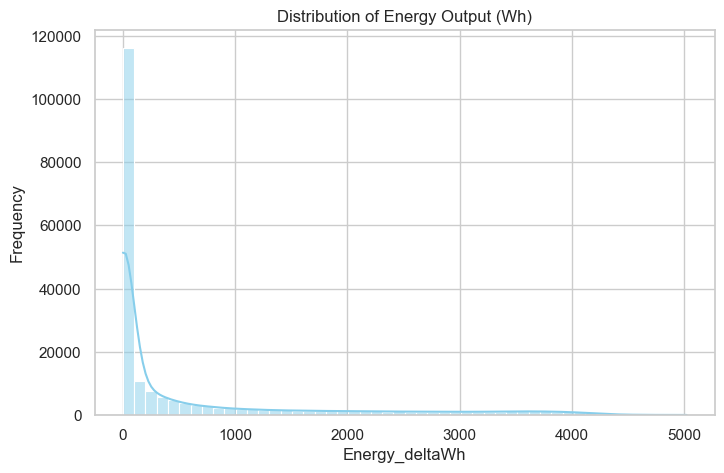

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

# --- Clean column names ---
df.columns = (
    df.columns.str.strip()
              .str.replace(' ', '_')
              .str.replace('[', '', regex=False)
              .str.replace(']', '', regex=False)
              .str.replace('/', '_')
)
print("Columns after cleanup:", df.columns.tolist())

# ✅ Correct target column name
target_col = 'Energy_deltaWh'

# --- 1. Basic overview ---
print("\nDataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary stats:\n", df.describe().T)

# --- 2. Target Distribution ---
plt.figure(figsize=(8,5))
sns.histplot(df[target_col], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Energy Output (Wh)')
plt.xlabel(target_col)
plt.ylabel('Frequency')
plt.show()

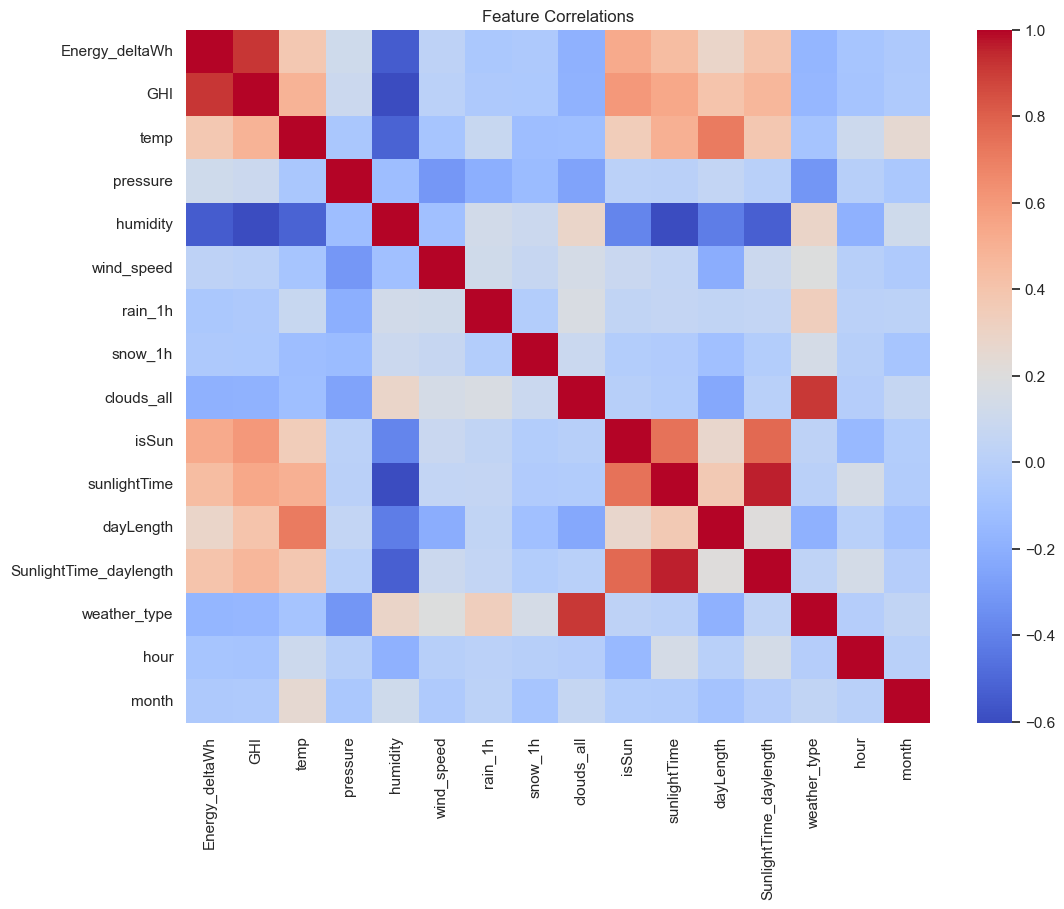

In [13]:
# --- 3. Correlation Heatmap ---
plt.figure(figsize=(12,9))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlations')
plt.show()

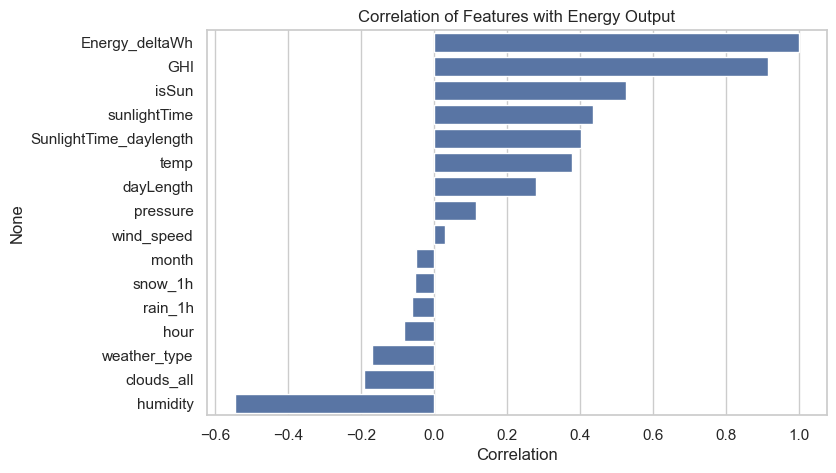

In [14]:
# --- 4. Correlation with Target ---
corr_target = corr[target_col].sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=corr_target.values, y=corr_target.index)
plt.title('Correlation of Features with Energy Output')
plt.xlabel('Correlation')
plt.show()

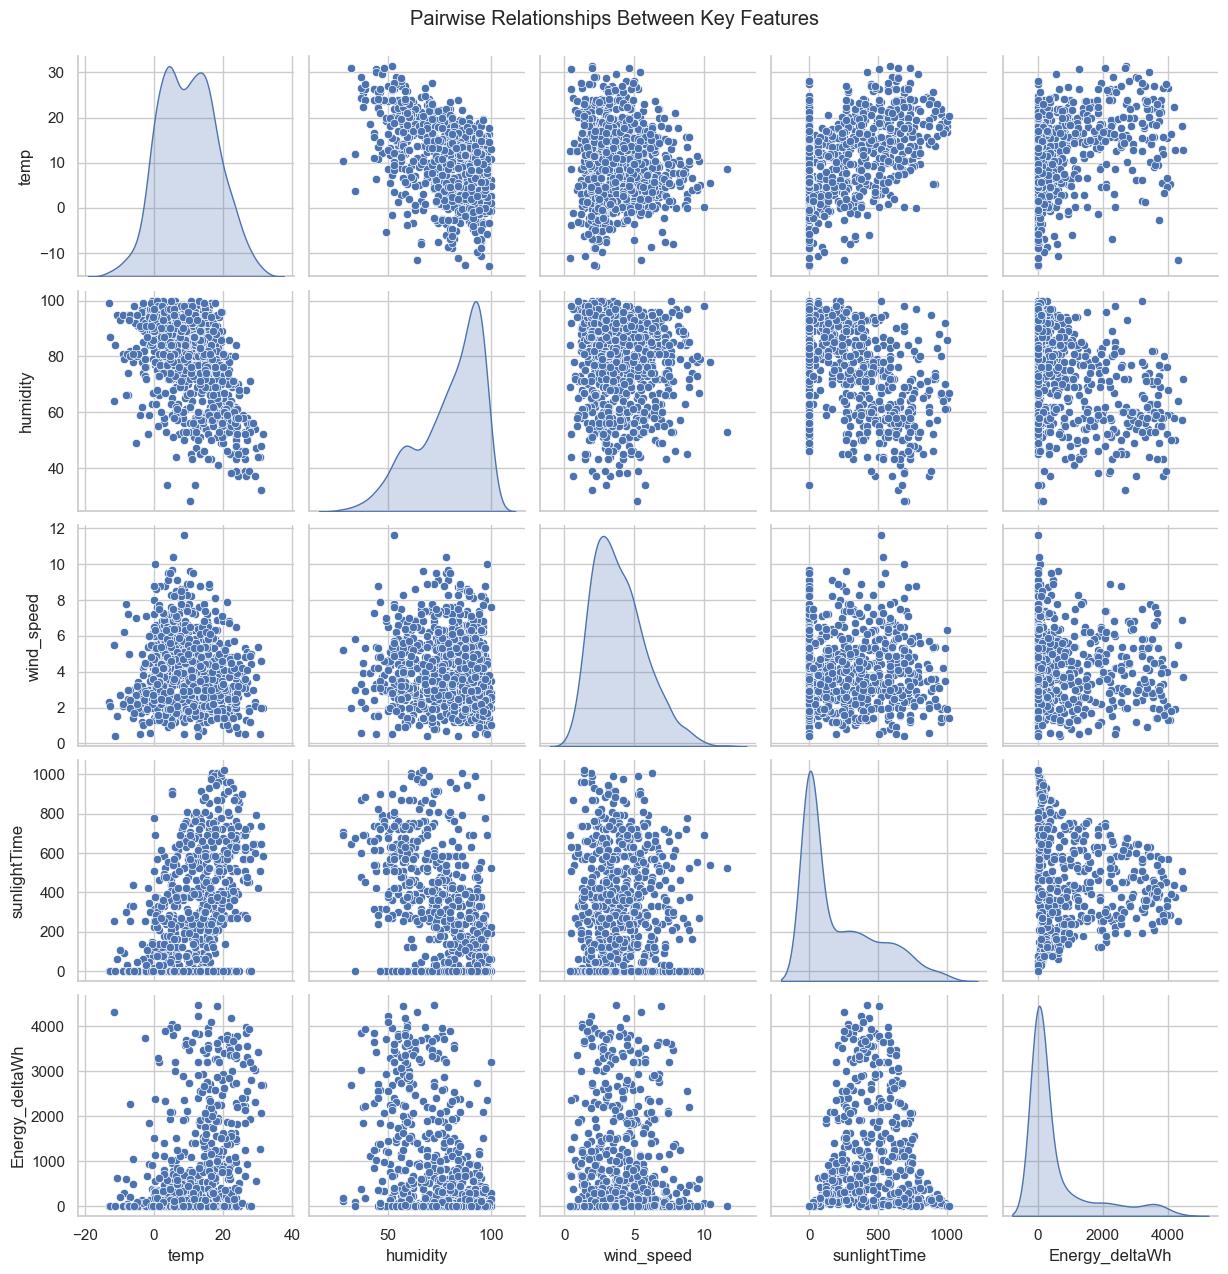

In [15]:

# --- 5. Pairplot (key features) ---
key_features = ['temp','humidity','wind_speed','sunlightTime',target_col]
sns.pairplot(df[key_features].sample(1000), diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Key Features', y=1.02)
plt.show()

C:\Users\sunsh\AppData\Local\Temp\ipykernel_28480\2811971623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y=target_col, data=df, palette='viridis')


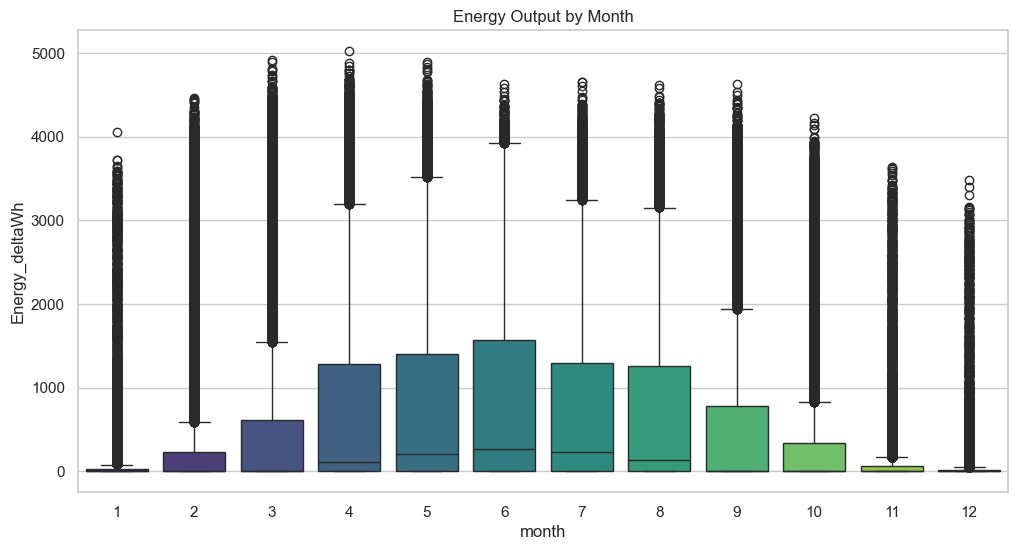

C:\Users\sunsh\AppData\Local\Temp\ipykernel_28480\2811971623.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y=target_col, data=df, palette='magma')


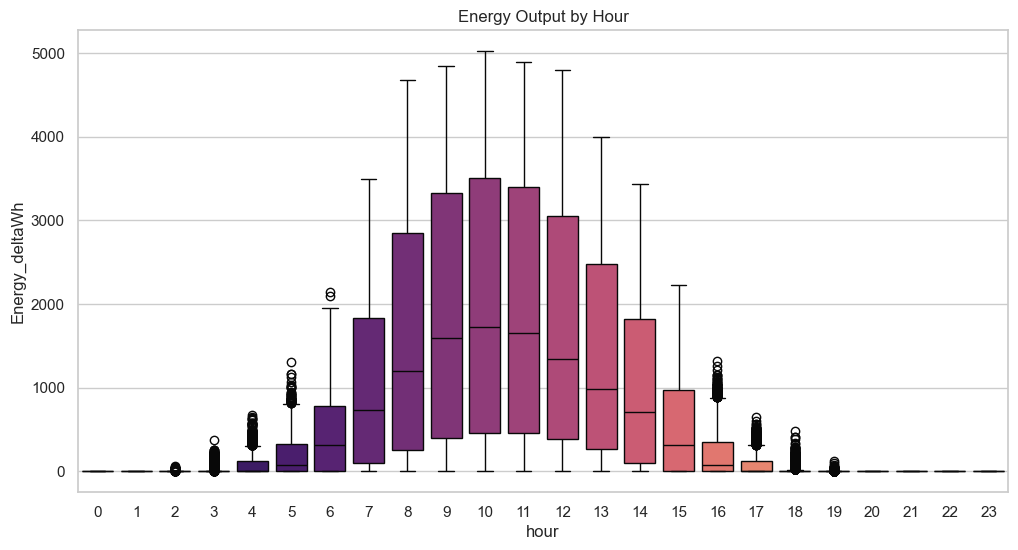

In [17]:
# --- 6. Boxplots by Month & Hour ---
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y=target_col, data=df, palette='viridis')
plt.title('Energy Output by Month')
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(x='hour', y=target_col, data=df, palette='magma')
plt.title('Energy Output by Hour')
plt.show()

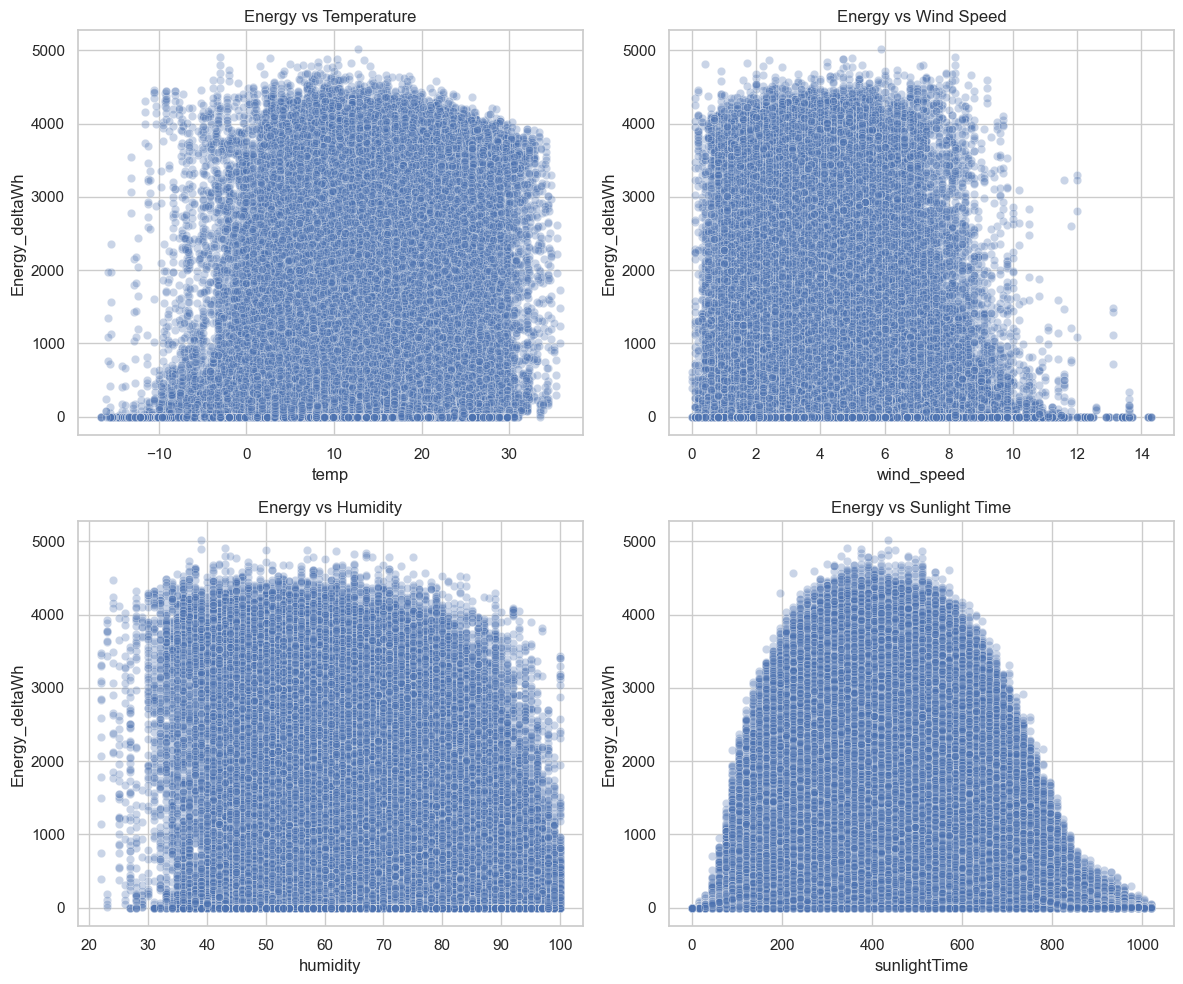

In [18]:

# --- 7. Scatterplots (Energy vs major weather features) ---
fig, axes = plt.subplots(2,2, figsize=(12,10))
sns.scatterplot(ax=axes[0,0], data=df, x='temp', y=target_col, alpha=0.3)
axes[0,0].set_title('Energy vs Temperature')

sns.scatterplot(ax=axes[0,1], data=df, x='wind_speed', y=target_col, alpha=0.3)
axes[0,1].set_title('Energy vs Wind Speed')

sns.scatterplot(ax=axes[1,0], data=df, x='humidity', y=target_col, alpha=0.3)
axes[1,0].set_title('Energy vs Humidity')

sns.scatterplot(ax=axes[1,1], data=df, x='sunlightTime', y=target_col, alpha=0.3)
axes[1,1].set_title('Energy vs Sunlight Time')
plt.tight_layout()
plt.show()


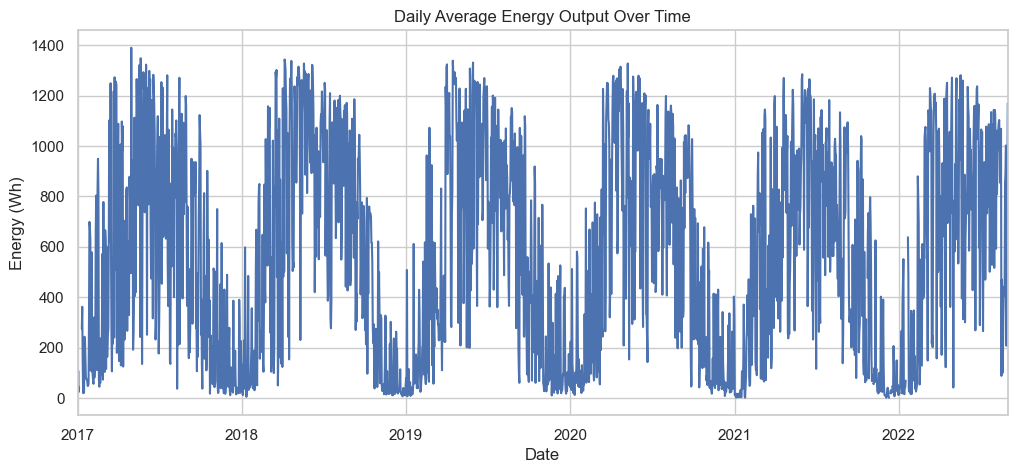

In [19]:

# --- 8. Time series trend ---
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')

plt.figure(figsize=(12,5))
df[target_col].resample('D').mean().plot()
plt.title('Daily Average Energy Output Over Time')
plt.xlabel('Date')
plt.ylabel('Energy (Wh)')
plt.show()

<Figure size 1200x500 with 0 Axes>

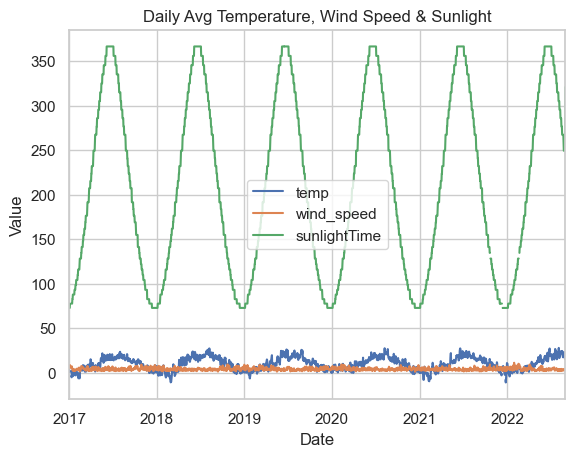

In [20]:
# --- 9. Weather features trend ---
plt.figure(figsize=(12,5))
df[['temp','wind_speed','sunlightTime']].resample('D').mean().plot()
plt.title('Daily Avg Temperature, Wind Speed & Sunlight')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()